# Unsupervised Learning 2 

## Lesson 4: Hierarchical Clustering

### Part 1: Identifying the 'Large' Customers

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

In [24]:
df = pd.read_csv("large_cust.csv", index_col='CustomerID')

In [25]:
df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,3,96,3837.45
12748,1,4051,30301.40
12749,4,199,4090.88
12820,4,59,942.34
12826,3,82,1319.72


In [26]:
df.describe()

,Recency,Frequency,Monetary
count,875.000000,875.000000,875.000000
mean,12.036571,243.406857,5428.827360
std,11.693102,400.075918,14055.916395
min,1.000000,3.000000,194.420000
25%,4.000000,97.000000,1560.675000
50%,9.000000,162.000000,2616.380000
75%,17.000000,280.500000,4670.740000
max,101.000000,7661.000000,231822.690000


In [27]:
df.shape

(875, 3)

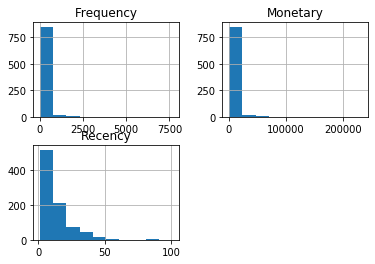

In [28]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

In [29]:
# Apply a log transform to the data
rfm_log = df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1)

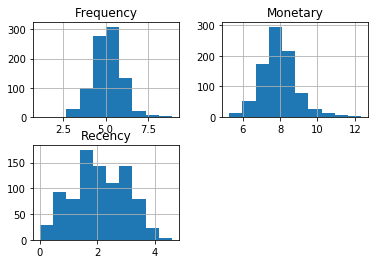

In [30]:
rfm_log.hist()
plt.show()

In [31]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,875.000000,875.000000,875.000000
mean,2.063900,5.080340,7.945183
std,0.956814,0.866925,0.962244
min,0.000000,1.098612,5.270021
25%,1.386294,4.574711,7.352864
50%,2.197225,5.087596,7.869547
75%,2.833213,5.636572,8.449068
max,4.615121,8.943898,12.353728


In [32]:
# hcluster on large customers
from sklearn.preprocessing import normalize

df_scaled = pd.DataFrame(normalize(rfm_log), columns=['Recency','Frequency','Monetary'], index=rfm_log.index)

In [33]:
df_scaled.describe()

,Recency,Frequency,Monetary
count,875.000000,875.000000,875.000000
mean,0.211693,0.521876,0.818287
std,0.091929,0.057276,0.039005
min,0.000000,0.090910,0.719872
25%,0.142362,0.494056,0.792135
50%,0.223269,0.524409,0.815923
75%,0.286216,0.557783,0.842684
max,0.400972,0.653926,0.995859


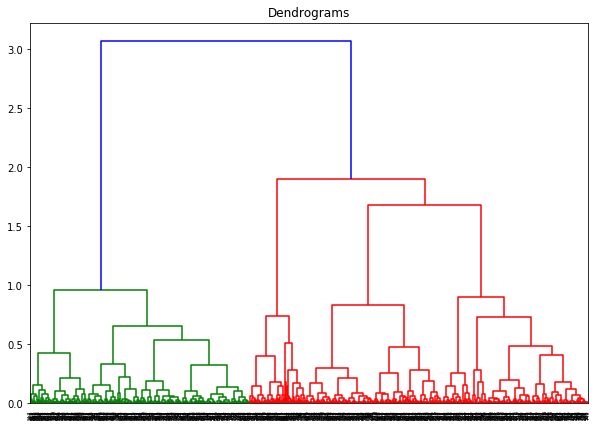

In [34]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = hc.dendrogram(hc.linkage(df_scaled, method='ward'))
plt.savefig("dendrogram_ward.png")

In [45]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster = model.fit_predict(df_scaled)

In [46]:
# This library is needed for 3d plots
from mpl_toolkits import mplot3d

%matplotlib inline

<Figure size 432x288 with 0 Axes>

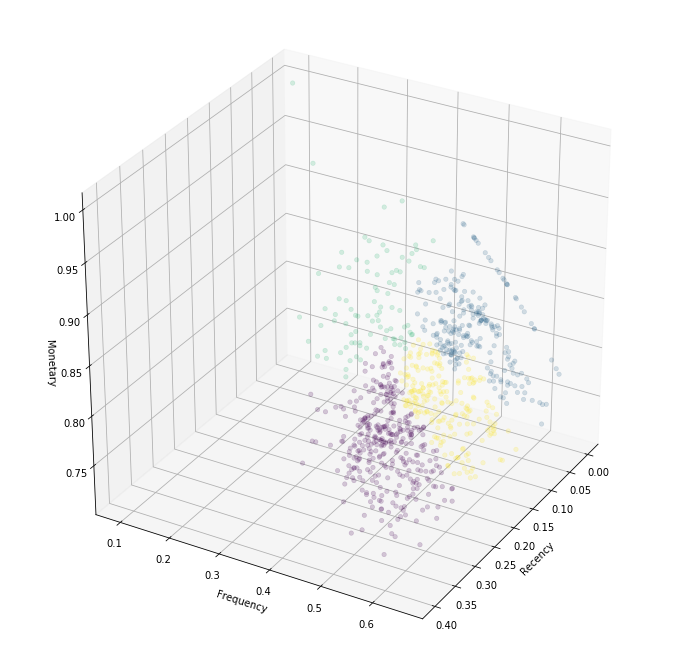

In [47]:
fig = plt.figure()
fig=plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.view_init(30, 30) # Rotate the view
ax.scatter(df_scaled.Recency, df_scaled.Frequency, df_scaled.Monetary, c=cluster, cmap='viridis', linewidth=0.5, alpha=0.2);
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca2 = pca.transform(df_scaled)

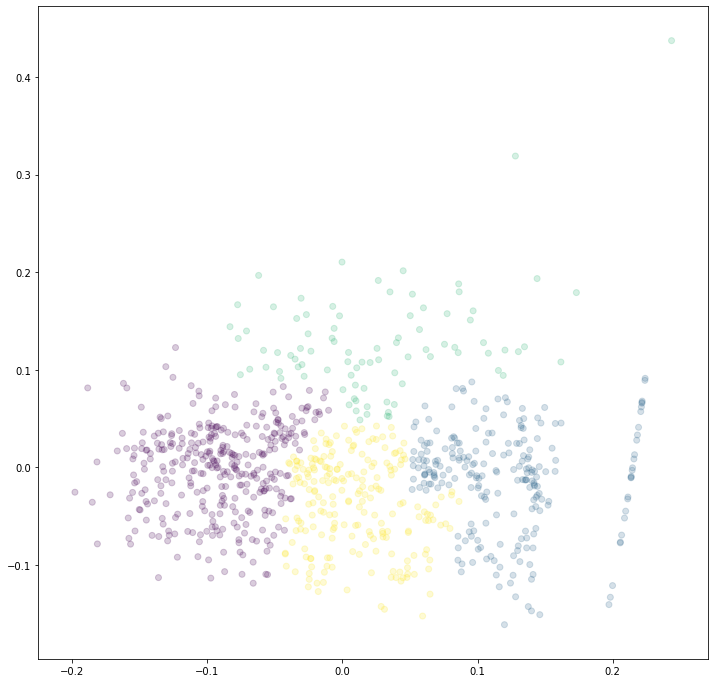

In [49]:
(x, y) = (df_pca2[:,0], df_pca2[:,1])
plt.figure(figsize=(12,12))
plt.scatter(x,y, c=cluster, alpha=0.2, cmap='viridis')
plt.show()

In [50]:
# h clustering on transactions
df['cluster'] = cluster

In [51]:
df.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12747,3,96,3837.45,1
12748,1,4051,30301.40,1
12749,4,199,4090.88,1
12820,4,59,942.34,3
12826,3,82,1319.72,1


In [52]:
df.groupby('cluster').mean()

,Recency,Frequency,Monetary
cluster,,,
0,22.072674,204.473837,3196.896860
1,2.688596,327.258772,7781.446667
2,8.306818,61.840909,12128.398523
3,7.418605,291.093023,3762.895395
